In [13]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
from scipy.stats import ttest_ind
import numpy as np
from scipy.stats.stats import pearsonr
from IPython.display import display, Markdown, Latex
plt.style.use('ggplot')
from datetime import date
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import norm
from seaborn_qqplot import pplot
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
import pandas

from scipy import stats

import geopandas as gpd
from matplotlib_scalebar.scalebar import ScaleBar
data_path = '/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/'

/var/folders/8g/qp1k_1g91m5f2m9pypxwxdhh0000gn/T/ipykernel_86025/135723201.py:8: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


In [2]:
clean_nw = gpd.read_file(data_path + 'nw_clean_shape/nw_clean_shape.shp')

In [3]:
clean_nw = clean_nw.dissolve(by='location')

In [4]:
heatwave_control = pd.read_csv(data_path + "mobility_heat/final_multivariate_clean_90_v1.csv")

## Heat-control days difference

In [5]:
heatwave_control.groupby('state')['location'].describe()

,count,unique,top,freq
state,,,,
British Columbia,1081,24,"Columbia-Shuswap, British Columbia",55
California,2200,56,"Tulare County, California",54
Oregon,1337,34,"Deschutes County, Oregon",54
Washington,1468,36,"Yakima County, Washington",53


In [6]:
heatwave_control['date_heat'] = pd.to_datetime(heatwave_control['date_heat'])

In [7]:
heatwave_control['control_day'] = pd.to_datetime(heatwave_control['control_day'])

In [8]:
heatwave_control['date_diff'] = pd.Series(heatwave_control['date_heat'] - heatwave_control['control_day'])

In [9]:
heatwave_control['date_diff'] = [x.days for x in heatwave_control['date_diff']]

In [10]:
abs(heatwave_control['date_diff']).describe()

count    6086.000000
mean       10.539106
std         5.353658
min         7.000000
25%         7.000000
50%         7.000000
75%        14.000000
max        49.000000
Name: date_diff, dtype: float64

In [35]:
len(heatwave_control[abs(heatwave_control['date_diff']) >= 21]) / len(heatwave_control)

0.11337495892211633

In [28]:
percentile = stats.percentileofscore(abs(heatwave_control['date_diff'].values), 15)



In [29]:
percentile

88.66250410778837

## Methods section avg variable

In [128]:
heatwave_control['temperature_2m_heat'].describe()

count    6086.000000
mean       33.392871
std         5.037908
min        18.414703
25%        29.775768
50%        33.688816
75%        36.818149
max        47.254585
Name: temperature_2m_heat, dtype: float64

In [129]:
heatwave_control['temp_diff'].describe()

count    6086.000000
mean        8.301605
std         3.920346
min         1.181474
25%         5.372367
50%         7.651448
75%        10.582913
max        26.192260
Name: temp_diff, dtype: float64

In [130]:
heatwave_control.drop_duplicates('location')['temperature_2m_winter'].describe()

count    150.000000
mean       3.670919
std        5.495883
min      -16.389372
25%        0.942652
50%        4.453752
75%        7.436603
max       14.461462
Name: temperature_2m_winter, dtype: float64

In [131]:
heatwave_control.drop_duplicates('heat_ID')['year'].value_counts() / 1877

2021    0.380394
2022    0.366542
2020    0.257858
Name: year, dtype: float64

In [132]:
heatwave_control.drop_duplicates('heat_ID')['june_hw'].describe()

count    1886.000000
mean        0.137858
std         0.344842
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: june_hw, dtype: float64

In [133]:
heatwave_control.drop_duplicates('heat_ID')['heatwave_dur'].value_counts() / 1877

<5 days     0.769313
>=5 days    0.235482
Name: heatwave_dur, dtype: float64

In [134]:
heatwave_control['stage_frac'].describe()

count    6086.000000
mean       63.875510
std        28.353541
min         9.090909
25%        40.000000
50%        62.500000
75%       100.000000
max       100.000000
Name: stage_frac, dtype: float64

In [135]:
heatwave_control['weekend'].describe()

count    6086.000000
mean        0.261748
std         0.439622
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: weekend, dtype: float64

In [136]:
heatwave_control.drop_duplicates('location')['coast_binary'].describe()

count    150.000000
mean       0.300000
std        0.459793
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: coast_binary, dtype: float64

In [137]:
heatwave_control.drop_duplicates('location')['popdens_dec'].describe()

count    150.000000
mean       5.773333
std        2.800160
min        1.000000
25%        3.000000
50%        6.000000
75%        8.000000
max       10.000000
Name: popdens_dec, dtype: float64

In [138]:
heatwave_control.drop_duplicates('location')['income_dec'].describe()

count    150.000000
mean       5.606667
std        2.914662
min        1.000000
25%        3.000000
50%        6.000000
75%        8.000000
max       10.000000
Name: income_dec, dtype: float64

In [139]:
heatwave_control.drop_duplicates('location')['nonwhite_dec'].describe()

count    150.000000
mean       5.573333
std        2.938627
min        1.000000
25%        3.000000
50%        6.000000
75%        8.000000
max       10.000000
Name: nonwhite_dec, dtype: float64

In [140]:
heatwave_control.drop_duplicates('location')['over65_dec'].describe()

count    150.000000
mean       5.326667
std        2.817721
min        1.000000
25%        3.000000
50%        5.000000
75%        8.000000
max       10.000000
Name: over65_dec, dtype: float64

### Results descriptive statistics

In [141]:
heatwave_control.groupby('state')['temperature_2m_heat'].describe()

,count,mean,std,min,25%,50%,75%,max
state,,,,,,,,
British Columbia,1081.0,27.597289,3.360915,18.414703,25.421389,27.379768,29.502647,40.565983
California,2200.0,36.453434,4.111702,24.487600,33.736925,36.466424,39.429331,47.254585
Oregon,1337.0,33.478182,3.115946,23.544898,31.910144,33.571451,35.298820,44.444744
Washington,1468.0,32.996226,4.879983,19.978627,29.390089,33.168928,36.520507,46.929940


In [142]:
heatwave_control.drop_duplicates('heat_ID').groupby('state')['Heat Wave Duration'].describe()

,count,mean,std,min,25%,50%,75%,max
state,,,,,,,,
British Columbia,294.0,3.850340,2.001207,2.0,2.0,3.0,5.0,9.0
California,712.0,3.557584,2.001279,2.0,2.0,3.0,4.0,11.0
Oregon,439.0,3.359909,1.830197,2.0,2.0,3.0,4.0,10.0
Washington,441.0,3.582766,1.872789,2.0,2.0,3.0,4.0,11.0


In [149]:
heatwave_control[['residential_difference', 'workplaces_difference', 'transit_difference', 'grocery_pharmacy_difference', 'retail_difference', 'parks_difference']].describe()

,residential_difference,workplaces_difference,transit_difference,grocery_pharmacy_difference,retail_difference,parks_difference
count,4884.000000,5941.000000,3391.000000,4482.000000,5227.000000,2818.000000
mean,-0.077600,-0.518431,-0.680035,1.242972,0.426057,-1.605749
std,1.501967,3.566710,8.479401,6.326961,6.721429,26.826260
min,-6.000000,-17.000000,-41.000000,-27.000000,-31.000000,-119.000000
25%,-1.000000,-2.000000,-4.000000,-2.000000,-3.000000,-16.000000
50%,0.000000,0.000000,-1.000000,1.000000,0.000000,-5.000000
75%,1.000000,1.000000,3.000000,4.000000,3.000000,8.000000
max,6.000000,16.000000,41.000000,30.000000,31.000000,122.000000


### State Plot

In [105]:
location_temps = pd.DataFrame(heatwave_control.groupby('location')['temperature_2m_heat'].mean()).reset_index()
location_temps = gpd.GeoDataFrame(location_temps.merge(clean_nw, on='location'))
location_temps.to_crs(epsg=3857, inplace=True)
clean_nw.to_crs(epsg=3857, inplace=True)



In [106]:
import matplotlib.image as img

from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox

im=img.imread(r'/Users/shivyucel/Documents/projects/DPhil/Code_Data/misc/north_arrow.jpeg')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


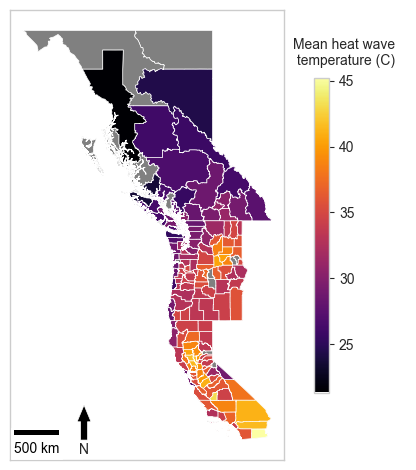

In [107]:
sns.set_style('whitegrid')
fig, ax = plt.subplots()
clean_nw.plot(ax=ax, color='grey')
location_temps.plot(column='temperature_2m_heat', legend=True, ax=ax, cmap='inferno', legend_kwds={'shrink': 0.7})
ax.add_artist(ScaleBar(1, location='lower left')  )
ax.set_yticks([])
ax.set_xticks([])
ax.legend(loc=(1, .83),
          fontsize=15,
          frameon=False,
          title="Mean heat wave \n temperature (C)")

x, y, arrow_length = 0.27, 0.122, 0.1
ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=5, headwidth=10),
            ha='center', va='center', fontsize=10,
            xycoords=ax.transAxes)


plt.tight_layout()
plt.savefig("/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/results/plots/heat_state_plot_v6.png", dpi=400)


In [108]:
location_temps.to_file('/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/results/plots/state_maps/location_temps.shp')

/var/folders/8g/qp1k_1g91m5f2m9pypxwxdhh0000gn/T/ipykernel_13223/2682032165.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  location_temps.to_file('/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/results/plots/state_maps/location_temps.shp')


In [147]:
plot_2_summary = heatwave_control.melt(id_vars=['year', 'state'], value_vars=['workplaces_difference', 'residential_difference', 'transit_difference', 'grocery_pharmacy_difference', 'parks_difference', 'retail_difference'])
plot_2_summary.to_csv('/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/results/plots/year_describe_v5.csv')

In [148]:
plot_3_summary = heatwave_control.melt(id_vars=['temperature_2m_heat', 'state'], value_vars=['workplaces_difference', 'residential_difference', 'transit_difference', 'grocery_pharmacy_difference', 'parks_difference', 'retail_difference'])
plot_3_summary.to_csv('/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/results/plots/scatterplot_v7.csv')

In [145]:
heatwave_control['temperature_2m_heat'].mean()

33.392870965862436

In [146]:
heatwave_control.groupby('year')['residential_difference'].describe()

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
2020,1093.0,-0.106130,1.062898,-5.0,-1.0,0.0,0.0,6.0
2021,1881.0,0.053163,1.471481,-6.0,-1.0,0.0,1.0,6.0
2022,1910.0,-0.190052,1.720978,-5.0,-1.0,0.0,1.0,5.0
